In [37]:
import numpy as np

X = 2 * np.random.rand(100, 1)
y = 4 + 3 * X + np.random.rand(100, 1)

#print(X)
#print(y)

In [38]:
len(X)

100

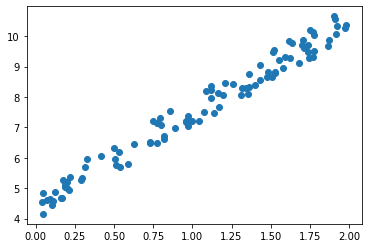

In [39]:
import matplotlib.pyplot as plt

plt.scatter(X, y)

In [40]:
X_b = np.c_[np.ones((100, 1)), X]
print(X_b)
theta_best = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y)

[[1.         0.12334221]
 [1.         1.35441524]
 [1.         1.35896121]
 [1.         0.0883306 ]
 [1.         0.88915175]
 [1.         1.68322677]
 [1.         1.11734946]
 [1.         1.87362221]
 [1.         0.29382085]
 [1.         0.59224108]
 [1.         1.75134711]
 [1.         0.81867789]
 [1.         1.62585727]
 [1.         1.07292654]
 [1.         0.21688072]
 [1.         1.76815393]
 [1.         0.9981401 ]
 [1.         1.98300167]
 [1.         1.57713148]
 [1.         1.77145908]
 [1.         1.9164427 ]
 [1.         0.41509385]
 [1.         1.92330088]
 [1.         1.90655395]
 [1.         0.04418035]
 [1.         1.70241244]
 [1.         1.6373236 ]
 [1.         0.74973779]
 [1.         0.33045777]
 [1.         0.2154849 ]
 [1.         0.73014412]
 [1.         0.51142165]
 [1.         0.62783359]
 [1.         0.97458476]
 [1.         1.39884872]
 [1.         0.29084709]
 [1.         1.77378659]
 [1.         1.04033422]
 [1.         1.19726997]
 [1.         0.20142622]


In [41]:
theta_best

array([[4.44334592],
       [3.01297901]])

In [42]:
X_new = np.array([[0], [2]])
X_new

array([[0],
       [2]])

In [43]:
X_new_b = np.c_[np.ones((2, 1)), X_new]
X_new_b

array([[1., 0.],
       [1., 2.]])

In [44]:
y_predict = X_new_b.dot(theta_best)
y_predict

array([[ 4.44334592],
       [10.46930393]])

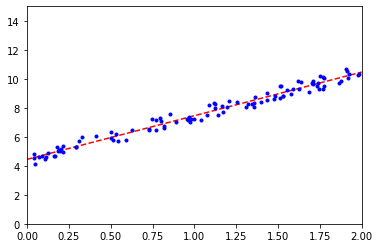

In [45]:
#plt.clear()
plt.plot(X_new, y_predict, 'r--')
plt.plot(X, y, 'b.')
plt.axis([0, 2, 0, 15])
plt.show()

In [46]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(X, y)

lin_reg.intercept_, lin_reg.coef_
lin_reg.predict(X_new)

array([[ 4.44334592],
       [10.46930393]])

In [47]:
theta_best_svd, residuals, rank, s = np.linalg.lstsq(X_b, y, rcond=1e-6)
theta_best_svd

array([[4.44334592],
       [3.01297901]])

In [48]:
np.linalg.pinv(X_b).dot(y)

array([[4.44334592],
       [3.01297901]])

In [49]:
eta = 0.1
n_iterations = 1000
m = 100

theta = np.random.randn(2,1)

for iteration in range(n_iterations):
    gradients = 2/m * X_b.T.dot(X_b.dot(theta) - y)
    theta = theta - eta * gradients

In [50]:
print(theta)

[[4.44334592]
 [3.01297901]]


[[1.67560745]
 [1.55828921]]
[[2.26667839]
 [1.67651529]]
[[2.87060141]
 [1.87608634]]
[[3.30278366]
 [2.19164167]]
[[3.82655372]
 [3.08570859]]
[[3.90862918]
 [3.14563551]]
[[3.93351088]
 [3.17944877]]
[[3.94931306]
 [3.20064609]]
[[4.0748562 ]
 [3.39122211]]
[[4.12177636]
 [3.42877864]]
[[4.02870777]
 [3.32261574]]
[[4.02194273]
 [3.32228233]]
[[4.00814806]
 [3.2982655 ]]
[[4.07448819]
 [3.35136645]]
[[4.19622605]
 [3.39159568]]
[[4.12199379]
 [3.29071691]]
[[4.14675464]
 [3.3184914 ]]
[[4.08635597]
 [3.25565659]]
[[4.09172525]
 [3.25655937]]
[[4.09197054]
 [3.25679455]]
[[4.14444413]
 [3.29879625]]
[[4.22955212]
 [3.36260492]]
[[4.13215192]
 [3.23068461]]
[[4.110333  ]
 [3.20890627]]
[[4.19080771]
 [3.22312483]]
[[4.26426518]
 [3.28140007]]
[[4.27488263]
 [3.29662087]]
[[4.29949489]
 [3.30127308]]
[[4.22022336]
 [3.15274818]]
[[4.20994947]
 [3.1360443 ]]
[[4.26975257]
 [3.14901444]]
[[4.3024672 ]
 [3.19591295]]
[[4.28406424]
 [3.17826899]]
[[4.26407146]
 [3.16190135]]
[[4.22233975]


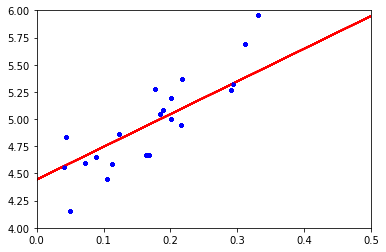

In [51]:
n_epochs = 50
t0, t1 = 5, 50

def learning_schedule(t):
    return t0 / (t + t1)

theta = np.random.rand(2,1)

X_gradient = np.c_[np.ones((2, 1)), X_new]

for epoch in range(n_epochs):
    for i in range(m):
        random_index = np.random.randint(m)
        xi = X_b[random_index:random_index+1]
        yi = y[random_index:random_index+1]

        gradients = 2 * xi.T.dot(xi.dot(theta) - yi)

        eta = learning_schedule(epoch * m + i)

        theta = theta - eta * gradients

        y_gradient = X_gradient.dot(theta_best)
        
        print(theta)

    plt.plot(X_gradient, y_gradient, 'r-')
    plt.plot(X, y, 'b.')
    plt.axis([0, 0.5, 4, 6])

plt.show()

In [52]:
print(theta)

[[4.44002039]
 [3.02152448]]


In [53]:
from sklearn.linear_model import SGDRegressor

sgd_reg = SGDRegressor(max_iter=1000, tol=1e-3, penalty=None, eta0=0.1)
sgd_reg.fit(X, y.ravel())

SGDRegressor(eta0=0.1, penalty=None)

In [54]:
sgd_reg.intercept_, sgd_reg.coef_

(array([4.43341538]), array([3.05199052]))

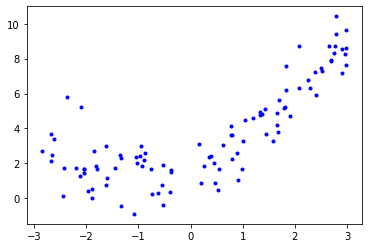

In [55]:
m = 100
X = 6 * np.random.rand(m, 1) - 3
y = 0.5 * X**2 + X + 2 + np.random.randn(m , 1) 

plt.plot(X, y, 'b.')
plt.show()

In [56]:
from sklearn.preprocessing import PolynomialFeatures

poly_features = PolynomialFeatures(degree=2, include_bias=False)
X_poly = poly_features.fit_transform(X)

print(X[0])
print(X_poly[0])

[-0.9547194]
[-0.9547194   0.91148913]


In [57]:
lin_reg = LinearRegression()
lin_reg.fit(X_poly, y)

lin_reg.intercept_, lin_reg.coef_

(array([1.78484456]), array([[0.98231319, 0.5082672 ]]))

In [58]:
X_plot = np.array([[-3], [3]])
X_plot_poly = poly_features.fit_transform(X_plot)

print(X_plot[0])
print(X_plot_poly)

y_poly_predict = lin_reg.predict(X_poly)
#print(y_poly_predict)

[-3]
[[-3.  9.]
 [ 3.  9.]]


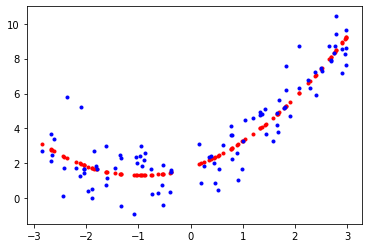

In [59]:
plt.plot(X, y_poly_predict, 'r.')
plt.plot(X, y, 'b.')

plt.show()

In [60]:
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

In [61]:
def Plot_learning_curve(model, X, y):
    X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2)
    train_errors, val_errors = [], []

    for m in range(1, len(X_train)):
        model.fit(X_train[:m], y_train[:m])
        y_train_predict = model.predict(X_train[:m])
        y_val_predict = model.predict(X_val)
        train_errors.append(mean_squared_error(y_train[:m], y_train_predict))
        val_errors.append(mean_squared_error(y_val, y_val_predict))

    plt.plot(np.sqrt(train_errors), 'r-+', linewidth=2, label='train')
    plt.plot(np.sqrt(val_errors), 'b-', linewidth=3, label='val')

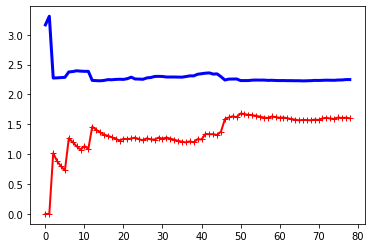

In [62]:
lin_reg = LinearRegression()
Plot_learning_curve(lin_reg, X, y)

(0.0, 80.0, 0.0, 3.0)

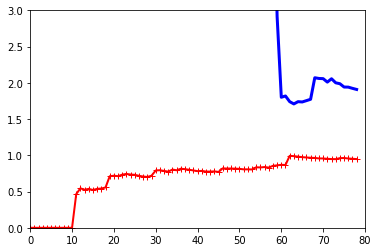

In [63]:
from sklearn.pipeline import Pipeline

polynomial_regression = Pipeline([
    ('poly_feature', PolynomialFeatures(degree=10, include_bias=False)),
    ('lin_reg', LinearRegression())
])

Plot_learning_curve(polynomial_regression, X, y)
plt.axis([0, 80, 0, 3])

In [64]:
from sklearn.linear_model import Ridge

ridge_reg = Ridge(alpha=1, solver='cholesky')
ridge_reg.fit(X, y)
ridge_reg.predict([[1.5]])

array([[5.15162544]])

In [65]:
sgd_reg = SGDRegressor(penalty='l2')
sgd_reg.fit(X, y.ravel())
sgd_reg.predict([[1.5]])

array([5.15584113])

In [66]:
from sklearn.linear_model import Lasso

lasso_reg = Lasso(alpha=0.1)
lasso_reg.fit(X, y)

lasso_reg.predict([[1.5]])

array([5.11708248])

In [67]:
sgd_reg = SGDRegressor(penalty='l1')
sgd_reg.fit(X, y.ravel())
sgd_reg.predict([[1.5]])

array([5.15916696])

In [68]:
from sklearn.linear_model import ElasticNet

elastic_req = ElasticNet(alpha=0.1, l1_ratio=0.5)
elastic_req.fit(X, y)

elastic_req.predict([[1.5]])

array([5.11419588])

In [69]:
from sklearn.base import clone
from sklearn.preprocessing import StandardScaler

poly_scaler = Pipeline([
    ('poly_feature', PolynomialFeatures(degree=90, include_bias=False)),
    ('std_scaler', StandardScaler())
])

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2)

X_train_poly = poly_scaler.fit_transform(X_train)
X_val_poly = poly_scaler.transform(X_val)

sgd_reg = SGDRegressor(max_iter=1, tol=np.infty, warm_start=True, penalty=None, learning_rate='constant', eta0=0.0005)

minimum_val_error = float('inf')
best_epoch = None
best_model = None

for epoch in range(1000):
    sgd_reg.fit(X_train_poly, y_train.ravel())
    y_val_predict = sgd_reg.predict(X_val_poly)
    val_error = mean_squared_error(y_val, y_val_predict)

    if val_error < minimum_val_error:
        minimum_val_error = val_error
        best_epoch = epoch
        best_model = clone(sgd_reg)

C:\Program Files (x86)\Microsoft Visual Studio\Shared\Python37_64\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:1223: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)
C:\Program Files (x86)\Microsoft Visual Studio\Shared\Python37_64\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:1223: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)
C:\Program Files (x86)\Microsoft Visual Studio\Shared\Python37_64\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:1223: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)
C:\Program Files (x86)\Microsoft Visual Studio\Shared\Python37_64\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:1223: ConvergenceWarning: